# Clustering
---


k-menas clustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# Excel 파일에서 데이터프레임 로드
df = pd.read_excel('/content/drive/Shareddrives/데이터마이닝 2023-2/datamining_dataset_final_한줄변환.xlsx', header=None, names = ['Colors'])


# 'colors' 열에서 색상 정보를 추출하고 유효성을 확인하여 리스트에 저장
logo_colors_rgb = []
for hex_color in df['Colors']:
    try:
        # '#'을 제거하고 비어있지 않은 경우에만 추가
        hex_color = hex_color.lstrip('#')
        if hex_color:
            # 뒤에 '.'이나 다른 문자가 붙어있는 경우 잘라냄
            hex_color = hex_color.split('.')[0]
            rgb = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
            logo_colors_rgb.append(rgb)
    except ValueError:
        print(f"에러: 잘못된 16진수 형식 - {hex_color}")


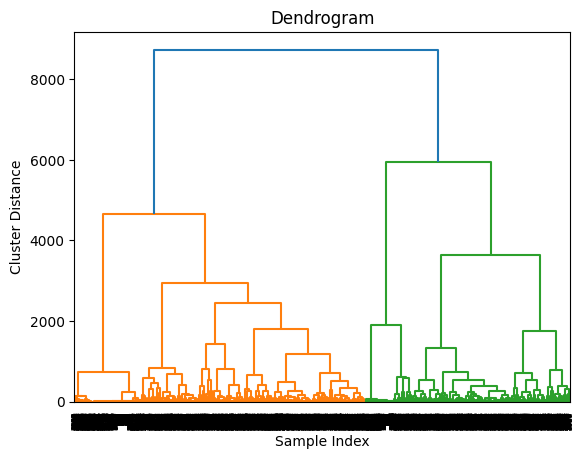

In [ ]:

# 계층적 클러스터링을 위한 거리 행렬 계산
dist_matrix = pdist(logo_colors_rgb)

# 거리 행렬을 이용하여 linkage matrix 생성
linkage_matrix = linkage(dist_matrix, method='ward')

# 덴드로그램 그리기
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# RGB 값을 0과 1 사이로 정규화
logo_colors_normalized = StandardScaler().fit_transform(logo_colors_rgb)

cluster_range = range(2, 51)  # 클러스터 개수 범위 설정 (2부터 50까지 시도)

# 최적의 클러스터 개수 찾기 - Silhouette Score
best_silhouette_score = -1
best_silhouette_clusters = 0
best_linkage = None

linkage_methods = ['ward', 'complete', 'average', 'single']  # 다양한 링크 함수 시도
for linkage_method in linkage_methods:
    silhouette_scores = []

    for n_clusters in cluster_range:
        clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method).fit(logo_colors_normalized)
        labels = clustering.labels_
        silhouette_scores.append(silhouette_score(logo_colors_normalized, labels))

    max_silhouette_score = max(silhouette_scores)
    if max_silhouette_score > best_silhouette_score:
        best_silhouette_score = max_silhouette_score
        best_silhouette_clusters = cluster_range[silhouette_scores.index(max_silhouette_score)]
        best_linkage = linkage_method



print(f"최적의 클러스터 개수 (Silhouette Score): {best_silhouette_clusters}")
print(f"최적의 링크 함수: {best_linkage}")

# 최적의 클러스터 개수와 링크 함수로 클러스터링 수행
best_clustering = AgglomerativeClustering(n_clusters=best_silhouette_clusters, linkage=best_linkage).fit(logo_colors_normalized)
best_labels = best_clustering.labels_

# 최적의 클러스터링 결과에 대한 실루엣 계수 출력
best_silhouette_avg = silhouette_score(logo_colors_normalized, best_labels)
print(f"최적의 클러스터링 결과 실루엣 계수: {best_silhouette_avg}")


최적의 클러스터 개수 (Silhouette Score): 18
최적의 링크 함수: average
최적의 클러스터링 결과 실루엣 계수: 0.44960113462389806


In [ ]:
from sklearn.cluster import KMeans

# 최적의 클러스터 개수 찾기 - Silhouette Score
best_silhouette_score = -1
best_silhouette_clusters = 0

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(logo_colors_normalized)
    silhouette_avg = silhouette_score(logo_colors_normalized, labels)

    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_silhouette_clusters = n_clusters

print(f"최적의 클러스터 개수 (Silhouette Score): {best_silhouette_clusters}")
print(f"최고 실루엣 계수: {best_silhouette_score}")


최적의 클러스터 개수 (Silhouette Score): 8
최고 실루엣 계수: 0.5067355787807503


In [ ]:
pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395103 sha256=477e1ea05a88c9cf8ede5b98c6a037ec1636acff28a610682c5798c728859519
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [ ]:
from pyclustering.cluster.cure import cure
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import calculate_distance_matrix
from pyclustering.utils.metric import distance_metric, type_metric
from sklearn.metrics import silhouette_score
import numpy as np
from PIL import ImageColor

# Read data from Excel file
file_path = '/content/drive/Shareddrives/데이터마이닝 2023-2/datamining_dataset_final.xlsx'
df = pd.read_excel(file_path)

# Function to convert hex to RGB
def hex_to_rgb(hex_color):
    return ImageColor.getcolor(hex_color, "RGB") if pd.notnull(hex_color) else [np.nan, np.nan, np.nan]

# Convert hex colors to RGB and calculate the average RGB values for each company
color_columns = ['colors1', 'colors2', 'colors3', 'colors4', 'colors5']  # Adjust as needed
for col in color_columns:
    df[col] = df[col].apply(hex_to_rgb)

# Calculate average RGB values
df['avg_rgb'] = df[color_columns].apply(lambda x: np.nanmean([np.array(i) for i in x if not np.isnan(i[0])], axis=0), axis=1)

# Extract RGB components
df['R'] = df['avg_rgb'].apply(lambda x: x[0])
df['G'] = df['avg_rgb'].apply(lambda x: x[1])
df['B'] = df['avg_rgb'].apply(lambda x: x[2])

X = df[['R', 'G', 'B']].dropna().values
#X = StandardScaler().fit_transform(X)  # Standardize features

# Assuming 'X' is your standardized data, converted to a list of lists
data = X.tolist()

# Calculate the distance matrix, as CURE can use a custom distance matrix
distance_matrix = calculate_distance_matrix(data)

# Define the metric to use
metric = distance_metric(type_metric.USER_DEFINED, func=lambda p1, p2: np.linalg.norm(np.array(p1) - np.array(p2)))

# Placeholder for the best score
best_score = -1
best_num_clusters = 0

# Test different numbers of clusters
for num_clusters in range(2, 20):  # Example range, adjust based on your dataset
    # Create CURE instance
    cure_instance = cure(data, num_clusters, number_represent_points=5, compression=0.5, ccore=False)  # Use ccore=False for the custom metric

    # Run CURE clustering
    cure_instance.process()
    clusters = cure_instance.get_clusters()

    # Prepare labels for silhouette score
    labels = [0] * len(data)
    for cluster_id, cluster in enumerate(clusters):
        for index in cluster:
            labels[index] = cluster_id

    # Calculate silhouette score
    score = silhouette_score(distance_matrix, labels, metric="precomputed")

    # Check if this score is better
    if score > best_score:
        best_score = score
        best_num_clusters = num_clusters

print(f'Best number of clusters: {best_num_clusters}')
print(f'Best silhouette score: {best_score}')


Best number of clusters: 2
Best silhouette score: 0.26473962476073276


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score


# 최적의 클러스터 개수 찾기 - Calinski-Harabasz Index
best_calinski_score = -1
best_calinski_clusters = 0
best_linkage = None

linkage_methods = ['ward', 'complete', 'average', 'single']  # 다양한 링크 함수 시도
for linkage_method in linkage_methods:
    calinski_scores = []

    for n_clusters in cluster_range:
        clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method).fit(logo_colors_rgb)
        labels = clustering.labels_
        calinski_scores.append(calinski_harabasz_score(logo_colors_rgb, labels))

    max_calinski_score = max(calinski_scores)
    if max_calinski_score > best_calinski_score:
        best_calinski_score = max_calinski_score
        best_calinski_clusters = cluster_range[calinski_scores.index(max_calinski_score)]
        best_linkage = linkage_method

print(f"최적의 클러스터 개수 (Calinski-Harabasz Index): {best_calinski_clusters}")
print(f"최적의 링크 함수: {best_linkage}")

# 최적의 클러스터 개수와 링크 함수로 클러스터링 수행
best_clustering = AgglomerativeClustering(n_clusters=best_calinski_clusters, linkage=best_linkage).fit(logo_colors_rgb)
best_labels = best_clustering.labels_

# 최적의 클러스터링 결과에 대한 Calinski-Harabasz Index 출력
best_calinski_score = calinski_harabasz_score(logo_colors_rgb, best_labels)
print(f"최적의 클러스터링 결과 Calinski-Harabasz Index: {best_calinski_score}")

최적의 클러스터 개수 (Calinski-Harabasz Index): 13
최적의 링크 함수: ward
최적의 클러스터링 결과 Calinski-Harabasz Index: 4067.1337022402226


In [ ]:
# 최적의 클러스터 개수 찾기 - Calinski-Harabasz Index
best_calinski_score = -1
best_calinski_clusters = 0

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(logo_colors_rgb)
    calinski_score = calinski_harabasz_score(logo_colors_rgb, labels)

    if calinski_score > best_calinski_score:
        best_calinski_score = calinski_score
        best_calinski_clusters = n_clusters

print(f"최적의 클러스터 개수 (Calinski-Harabasz Index): {best_calinski_clusters}")
print(f"최고 Calinski-Harabasz Index: {best_calinski_score}")


최적의 클러스터 개수 (Calinski-Harabasz Index): 8
최고 Calinski-Harabasz Index: 5025.467812233007


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score
from PIL import ImageColor


# Define range of clusters to try
cluster_range = range(2, 50)  # For example, trying from 2 to 10 clusters

# Finding the optimal number of clusters - Calinski-Harabasz Index
best_calinski_score = -1
best_calinski_clusters = 0
best_linkage = None

linkage_methods = ['ward', 'complete', 'average', 'single']
for linkage_method in linkage_methods:
    calinski_scores = []
    for n_clusters in cluster_range:
        clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method).fit(logo_colors_rgb)
        labels = clustering.labels_
        calinski_scores.append(calinski_harabasz_score(logo_colors_rgb, labels))

    max_calinski_score = max(calinski_scores)
    if max_calinski_score > best_calinski_score:
        best_calinski_score = max_calinski_score
        best_calinski_clusters = cluster_range[calinski_scores.index(max_calinski_score)]
        best_linkage = linkage_method

print(f"Best number of clusters (Calinski-Harabasz Index): {best_calinski_clusters}")
print(f"Best linkage method: {best_linkage}")

# Perform clustering with the best number of clusters and linkage method
best_clustering = AgglomerativeClustering(n_clusters=best_calinski_clusters, linkage=best_linkage).fit(logo_colors_rgb)
best_labels = best_clustering.labels_

# Output the Calinski-Harabasz Index for the best clustering result
best_calinski_score = calinski_harabasz_score(logo_colors_rgb, best_labels)

Best number of clusters (Calinski-Harabasz Index): 13
Best linkage method: ward


In [ ]:
from pyclustering.cluster.cure import cure
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import calculate_distance_matrix
from pyclustering.utils.metric import distance_metric, type_metric
from sklearn.metrics import calinski_harabasz_score
import numpy as np
from PIL import ImageColor
import pandas as pd

# Read data from Excel file
file_path = '/content/drive/Shareddrives/데이터마이닝 2023-2/datamining_dataset_final.xlsx'
df = pd.read_excel(file_path)

# Function to convert hex to RGB
def hex_to_rgb(hex_color):
  return ImageColor.getcolor(hex_color, "RGB") if pd.notnull(hex_color) else [np.nan, np.nan, np.nan]

# Convert hex colors to RGB and calculate the average RGB values for each company
color_columns = ['colors1', 'colors2', 'colors3', 'colors4', 'colors5'] # Adjust as needed
for col in color_columns:
  df[col] = df[col].apply(hex_to_rgb)

# Calculate average RGB values
df['avg_rgb'] = df[color_columns].apply(lambda x: np.nanmean([np.array(i) for i in x if not np.isnan(i[0])], axis=0), axis=1)

# Extract RGB components
df['R'] = df['avg_rgb'].apply(lambda x: x[0])
df['G'] = df['avg_rgb'].apply(lambda x: x[1])
df['B'] = df['avg_rgb'].apply(lambda x: x[2])

X = df[['R', 'G', 'B']].dropna().values

# Calculate the distance matrix, as CURE can use a custom distance matrix
distance_matrix = calculate_distance_matrix(X.tolist())

# Define the metric to use
metric = distance_metric(type_metric.USER_DEFINED, func=lambda p1, p2: np.linalg.norm(np.array(p1) - np.array(p2)))

# Placeholder for the best score
best_score = -1
best_num_clusters = 0

# Test different numbers of clusters
for num_clusters in range(2, 20): # Example range, adjust based on your dataset
  # Create CURE instance
  cure_instance = cure(X.tolist(), num_clusters, number_represent_points=5, compression=0.5, ccore=False) # Use ccore=False for the custom metric

  # Run CURE clustering
  cure_instance.process()
  clusters = cure_instance.get_clusters()

  # Prepare labels for Calinski-Harabasz Index
  labels = [0] * len(X)
  for cluster_id, cluster in enumerate(clusters):
      for index in cluster:
          labels[index] = cluster_id

  # Calculate Calinski-Harabasz Index
  score = calinski_harabasz_score(X, labels)

  # Check if this score is better
  if score > best_score:
      best_score = score
      best_num_clusters = num_clusters

print(f'Best number of clusters: {best_num_clusters}')
print(f'Best Calinski-Harabasz Index: {best_score}')

Best number of clusters: 2
Best Calinski-Harabasz Index: 334.3798064545509


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


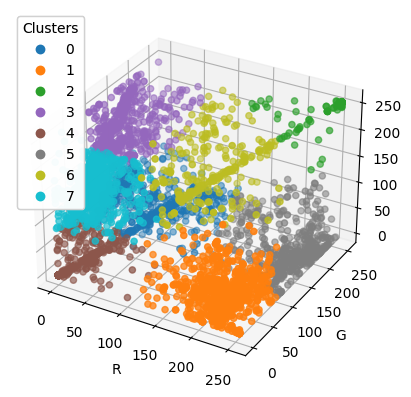

In [ ]:

# Set the optimal number of clusters obtained from your analysis
optimal_cluster_count = 8

# Apply k-means clustering
kmeans = KMeans(n_clusters=optimal_cluster_count, random_state=42)
labels = kmeans.fit_predict(logo_colors_rgb)

# 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors for each cluster
scatter = ax.scatter([color[0] for color in logo_colors_rgb],
                     [color[1] for color in logo_colors_rgb],
                     [color[2] for color in logo_colors_rgb],
                     c=labels, cmap='tab10', s=20)

# Add a color bar
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Axis labels
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

plt.show()

df['check'] = labels
check = df[['Colors', 'check']]
check.to_excel('/content/drive/MyDrive/check.xlsx', index=False)


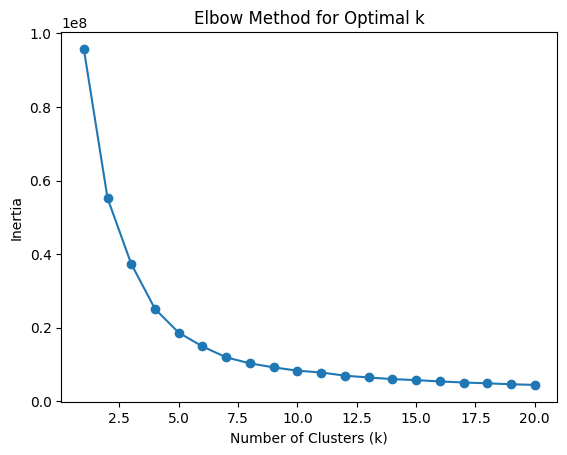


Inertia values for each k:
     k       Inertia
0    1  9.578671e+07
1    2  5.518798e+07
2    3  3.733531e+07
3    4  2.512175e+07
4    5  1.866411e+07
5    6  1.492061e+07
6    7  1.195371e+07
7    8  1.032511e+07
8    9  9.229903e+06
9   10  8.344246e+06
10  11  7.840655e+06
11  12  6.987978e+06
12  13  6.489751e+06
13  14  6.050476e+06
14  15  5.773128e+06
15  16  5.414362e+06
16  17  5.123566e+06
17  18  4.900878e+06
18  19  4.651199e+06
19  20  4.465725e+06


In [ ]:
# elbow graph
from sklearn.cluster import KMeans
def hex_to_rgb(hex_color):
    try:
        hex_color = hex_color.lstrip('#')
        return tuple(int(hex_color[i:i + 2], 16) for i in (0, 2, 4))
    except (ValueError, IndexError):
        return (0, 0, 0)

# Apply hex_to_rgb function to create 'RGB' column
df['RGB'] = df['Colors'].apply(hex_to_rgb)

# Perform KMeans clustering
inertia = []
for k in range(1, min(21, len(df) + 1)):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df['RGB'].tolist())
    inertia.append(kmeans.inertia_)

# Plotting Elbow Method
plt.plot(range(1, min(21, len(df) + 1)), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Creating a DataFrame to display the inertia values
inertia_df = pd.DataFrame({'k': range(1, min(21, len(df) + 1)), 'Inertia': inertia})
print("\nInertia values for each k:")
print(inertia_df)